# BFE data and metadat review 

## Resources Type

PDF file links, Not machine readable

https://opendata.swiss/en/dataset/beteiligung-des-bfe-an-internationalen-energieforschungsprogrammen/resource/640ea9b6-13bf-4678-921b-aabd7d68c9f9

https://pubdb.bfe.admin.ch/de/suche?keywords=393

CSV files https://opendata.swiss/de/dataset/kennzahlen-neuwagenflotte/resource/8d7d3efd-0f4c-4cee-89ea-ec52d9089703

XLSX files https://opendata.swiss/de/dataset/schweizerische-holzenergiestatistik/resource/693d5603-4e2d-442d-a8ed-daff3a70b077 

In [129]:
import json
import pprint
import requests  
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
data_xlsx = pd.ExcelFile("/Users/nataliia.kovalchuk/Downloads/10526-Schweizerische_Holzenergiestatistik_EJ2020_Datentabellen_FINAL.xlsx")
print(data_xlsx.sheet_names)

['Titelblatt', 'Info ', 'Tabellenübersicht', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R']


In [51]:
df_xlsx = data_xlsx.parse('A')

In [57]:
df_xlsx.tail(6)

,Kat.,Anlagenkategorien,1990,1991,1992,1993,1994,1995,1996,1997,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
28,C,Automatische Feuerungen (Kat. 12 - 18),2273.0,2535.0,2747.0,2941.0,3148.0,3393.0,3601.0,3771.0,...,8034.000000,8461.000000,8819.000000,9291.000000,9766.000000,10167.000000,10675.000000,11008.000000,11217.000000,11449.000000
29,D,Spezialfeuerungen (Kat. 19 - 20),48.0,50.0,52.0,54.0,59.0,59.0,62.0,64.0,...,88.000000,91.000000,93.000000,94.000000,95.000000,104.000000,108.000000,107.000000,107.000000,107.000000
30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,Total,Alle Anlagenkategorien (Kat. 1 - 20),692519.0,710624.0,723366.0,730833.0,737791.0,741754.0,746044.0,744675.0,...,630305.352941,620185.352941,614640.352941,604599.352941,595314.652941,586306.186941,574884.208901,563492.830202,550677.451504,539164.602509
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,Total,Anlagenkategorien 1-19 (ohne Kat. 20),692493.0,710598.0,723340.0,730807.0,737764.0,741727.0,746016.0,744648.0,...,630275.352941,620155.352941,614610.352941,604569.352941,595284.652941,586276.186941,574854.208901,563462.830202,550647.451504,539134.602509


In [87]:
years=df_xlsx.columns.tolist()
del years[:1]
del years[:1]

total=df_xlsx.loc[33, :].values.tolist()
del total[:1]
del total[:1]

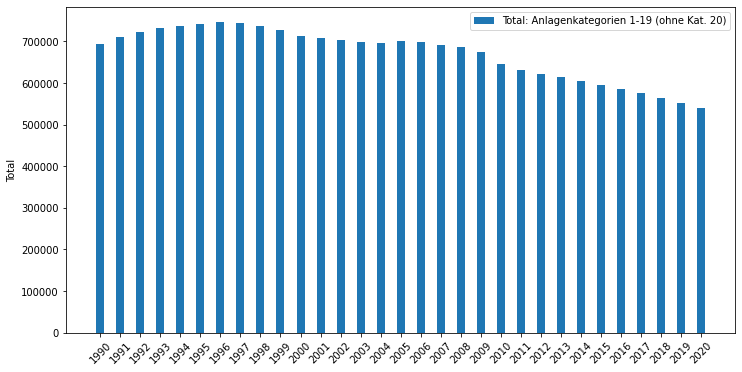

In [119]:
X_axis = np.arange(len(years))

plt.bar(X_axis, total, 0.4, label = 'Total: Anlagenkategorien 1-19 (ohne Kat. 20)')
plt.xticks(X_axis, years)
plt.ylabel("Total")
plt.xticks(rotation=45)
plt.legend()
plt.gcf().set_size_inches(12, 6, forward=True)
plt.show()



JSON files https://opendata.swiss/de/dataset/stand-der-energiepolitik-in-den-kantonen/resource/87442dce-ca62-49d3-b935-4cbe49221bf3

Opening directly in the browser, but not downloading, as it is described. 
Names of the files do not describe content. 

To get it on the machine: `curl https://www.uvek-gis.admin.ch/BFE/ogd/39/datapackage.json > datapackage_BFE.json` 


In [132]:
packages = 'https://www.uvek-gis.admin.ch/BFE/ogd/39/datapackage.json'
# HTTP request
response = requests.get(packages)
response_dict = json.loads(response.content)

In [146]:
with open('/Users/nataliia.kovalchuk/Downloads/datapackage_BFE.json', 'r') as datafile:
        data_json = json.load(datafile)
        

In [147]:
pprint.pprint(data_json)   

{'contributors': [{'role': 'author', 'title': 'OGD Fachstelle'}],
 'description@de': 'Der Bericht enthält Informationen zur aktuellen '
                   'Energiepolitik in den Kantonen sowie über deren '
                   'Aktivitäten in den Bereichen Strategie, Gesetzgebung, '
                   'indirekte und freiwillige Massnahmen sowie Förderung (u.a. '
                   'Stand der Umsetzung der kantonalen Mustervorschriften). '
                   'Gesetzliche Grundlage: Art. 19 Abs. 2 EnG',
 'description@fr': 'Ce rapport présente la politique énergétique menée '
                   'actuellement par les cantons, notamment leurs stratégies, '
                   'leurs législations, les activités par rapport aux mesures '
                   'indirectes librement consenties et leurs politiques '
                   "d'encouragement (notamment la concrétisation du Modèle de "
                   'prescriptions énergétiques des cantons). Base légale: art. '
                   '19, al.

XTF binary data https://opendata.swiss/de/dataset/energiestadte/resource/e93b1dfa-dfdc-4748-a89d-9e17f8e91922
Could be readed since it has too many channels.



In [150]:
test_file = r'/Users/nataliia.kovalchuk/Downloads/statistik-wasserkraftanlagen_2056.xtf/82_2StatisticsOfHydropowerPlants.xtf'
(fh, p) = pyxtf.xtf_read(test_file, n_channels=6)

TypeError: xtf_read() got an unexpected keyword argument 'n_channels'